In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('delhivery.csv')
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [4]:
data['source_name'].fillna('Not defined', inplace=True)

In [5]:
data['destination_name'].fillna('Not defined', inplace=True)

In [6]:
data.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data['actual_time_hours'] = (data['actual_time'] / 60).round(2)
data['trip_duration_hours'] = (data['start_scan_to_end_scan'] / 60).round(2)
data.drop(['actual_time', 'start_scan_to_end_scan'], axis=1, inplace=True)


In [9]:
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time_hours,trip_duration_hours
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,0.23,1.43
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,0.40,1.43
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,0.67,1.43
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,1.03,1.43
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,1.13,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,45.258278,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,1.57,7.12
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,54.092531,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,2.00,7.12
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,66.163591,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,2.33,7.12
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,73.680667,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,2.63,7.12


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Convert date columns to datetime
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])
data['od_start_time'] = pd.to_datetime(data['od_start_time'])


data['month'] = data['trip_creation_time'].dt.to_period('M').astype(str)
data['weekday'] = data['trip_creation_time'].dt.day_name()

In [12]:
#1.OSRM Accuracy Across Trip Types
data['osrm_error'] = abs(data['osrm_time'] - data['actual_time_hours'])
osrm_accuracy_by_route_type = data.groupby('route_type')['osrm_error'].mean()
print(osrm_accuracy_by_route_type)


route_type
Carting     29.274951
FTL        287.502325
Name: osrm_error, dtype: float64


In [13]:
#2.Delay pattern by destination
data['delay_minutes'] = data['segment_actual_time'] - data['segment_osrm_time']
delay_by_destination = data.groupby('destination_center')['delay_minutes'].mean().sort_values(ascending=False).head(10)
delay_by_destination

destination_center
IND490023AAA    818.000000
IND221401AAA    550.000000
IND145001AAA    293.948718
IND796009AAA    292.444444
IND473226AAA    277.800000
IND424006AAA    274.301587
IND176310AAA    262.700000
IND754103AAA    249.636364
IND222136AAA    238.666667
IND482002AAA    220.250000
Name: delay_minutes, dtype: float64

In [14]:
#3. Correlation Between Cutoff and Segment Factors
correlation_cf_sf=data[['cutoff_factor', 'segment_factor']].corr()
correlation_cf_sf

,cutoff_factor,segment_factor
cutoff_factor,1.000000,-0.031452
segment_factor,-0.031452,1.000000


In [18]:
#4.Segment Time Deviation
data['segment_time_diff'] = data['segment_actual_time'] - data['segment_osrm_time']
segment_time_stats= data['segment_time_diff'].describe()
segment_time_stats

count    144867.000000
mean         17.688563
std          49.010556
min        -274.000000
25%           5.000000
50%          10.000000
75%          19.000000
max        2418.000000
Name: segment_time_diff, dtype: float64

In [19]:
#5.Propotion of early trip factor
early_trips = (data['factor'] < 1).mean()
early_trips 

np.float64(0.017740410169327727)

In [20]:
#6. Standard Deviation of Actual Time by Route Type
std_by_route_type = data.groupby('route_type')['actual_time_hours'].std().sort_values(ascending=False)
std_by_route_type

route_type
FTL        11.024356
Carting     1.440885
Name: actual_time_hours, dtype: float64

In [21]:
#7.time_per_km_stats
data['time_per_km'] = data['actual_time_hours'] / data['actual_distance_to_destination']
time_per_km_stats = data['time_per_km'].describe()
time_per_km_stats

count    144867.000000
mean          0.036177
std           0.030700
min           0.002903
25%           0.025530
50%           0.029540
75%           0.037500
max           2.299315
Name: time_per_km, dtype: float64

In [19]:
#8.Delay percentage by source center
total_delay_by_source = data.groupby('source_center')['delay_minutes'].sum()
grand_total_delay = total_delay_by_source.sum()
delay_percentage = (total_delay_by_source / grand_total_delay) * 100
top_delay_percent = delay_percentage.sort_values(ascending=False).head(10)
print(top_delay_percent)


source_center
IND000000ACB    13.609385
IND421302AAG     6.329783
IND562132AAA     5.226364
IND411033AAA     2.473767
IND712311AAA     2.241375
IND501359AAE     2.117629
IND781018AAB     1.822018
IND110037AAM     1.588729
IND160002AAC     1.552514
IND395023AAA     1.417450
Name: delay_minutes, dtype: float64


In [20]:
#9.% of late and on time deliveries
on_time_pct = (data['delay_minutes'] <= 0).mean() * 100
late_pct = (data['delay_minutes'] > 0).mean() * 100
print(f"On-Time Deliveries: {on_time_pct:.2f}%, Late Deliveries: {late_pct:.2f}%")


On-Time Deliveries: 10.28%, Late Deliveries: 89.72%


In [23]:
#10.delay distribution by weekday and weekends
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'], errors='coerce')
data['day_type'] = data['trip_creation_time'].dt.day_name().isin(['Saturday', 'Sunday']).map({True: 'Weekend', False: 'Weekday'})
weekend_delay = data.groupby('day_type')['delay_minutes'].mean()
print(weekend_delay)


day_type
Weekday    17.653058
Weekend    17.789108
Name: delay_minutes, dtype: float64


In [22]:
#11.top route schedules by total delay
total_delay_by_route = data.groupby('route_schedule_uuid')['delay_minutes'].sum().sort_values(ascending=False).head(10)
print(total_delay_by_route)


route_schedule_uuid
thanos::sroute:bcce7b68-e962-4a29-af24-167e3e926d04    29519.0
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    28932.0
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    26774.0
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    25404.0
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    22678.0
thanos::sroute:25dd334d-e30d-4cfa-b6e8-192bcfe84fcc    19794.0
thanos::sroute:e2f5faaa-455a-494b-a501-549c3e3081ec    19724.0
thanos::sroute:96a80600-40e1-436b-9161-fa68f9e4b0d6    19689.0
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    19297.0
thanos::sroute:396d96a3-e2f8-4c40-af0e-056e11f57761    18762.0
Name: delay_minutes, dtype: float64


In [24]:

#12.on time delivery rate by day type
on_time_rate = data.groupby('day_type')['delay_minutes'].apply(lambda x: (x <= 0).mean() * 100)
print("On-Time Delivery Rate (%):\n", on_time_rate)


On-Time Delivery Rate (%):
 day_type
Weekday    10.389404
Weekend     9.961382
Name: delay_minutes, dtype: float64


In [25]:
#13.Average trip duration by route type
trip_duration_by_route = data.groupby('route_type')['trip_duration_hours'].mean().sort_values(ascending=False)
print(trip_duration_by_route)


route_type
FTL        21.711576
Carting     3.476158
Name: trip_duration_hours, dtype: float64


In [ ]:
# 1. Average trip duration by route type

avg_duration_by_route = data.groupby("route_type")["trip_duration_hours"].mean().sort_values()
sns.barplot(x=avg_duration_by_route.values, y=avg_duration_by_route.index, palette="viridis")
plt.title("Average Trip Duration by Route Type", fontsize=18)
plt.xlabel("Average Duration (hours)", fontsize=14)
plt.ylabel("Route Type", fontsize=14)


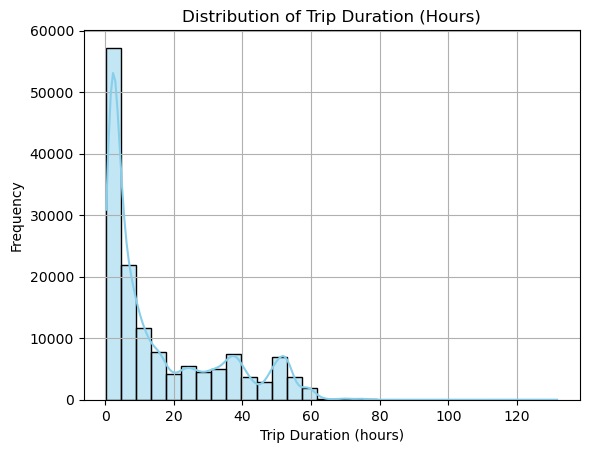

In [24]:
#2.distribution of trip duration
sns.histplot(data['trip_duration_hours'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Trip Duration (Hours)")
plt.xlabel("Trip Duration (hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

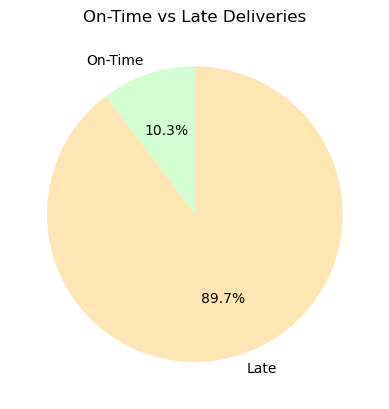

In [25]:
#3.Calculate delay in minutes if not already created
data['delay_minutes'] = data['segment_actual_time'] - data['segment_osrm_time']
on_time = (data['delay_minutes'] <= 0).sum()
late = (data['delay_minutes'] > 0).sum()
plt.pie([on_time, late], labels=["On-Time", "Late"], autopct='%1.1f%%', colors=[ '#D1FFD1','#FFE5B4' ], startangle=90)
plt.title("On-Time vs Late Deliveries")
plt.show()


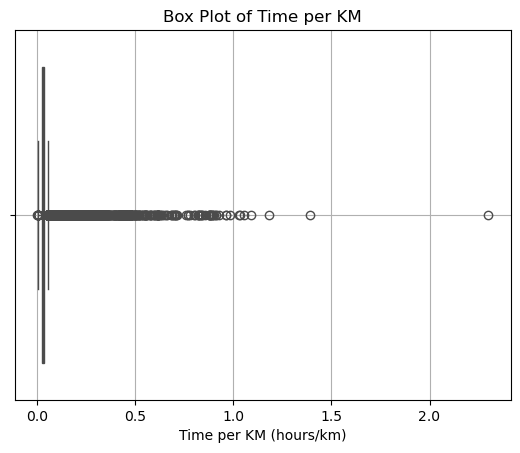

In [26]:
#4.Time per distribution km
sns.boxplot(x=data['time_per_km'], color='steelblue')
plt.title("Box Plot of Time per KM")
plt.xlabel("Time per KM (hours/km)")
plt.grid(True)
plt.show()


In [30]:
# 5. Trips per weekday

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = data['weekday'].value_counts().reindex(weekday_order)
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='Set2')
plt.title("Number of Trips by Weekday", fontsize=18)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Trip Count", fontsize=14)


KeyError: 'weekday'

In [29]:
data.to_csv("modified_delhivery",index=False)